# Лабораторная работа №4, Грызин Алексей РТ5-61Б
## Линейные модели, SVM и деревья решений.
- #### Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

### Задание:
 1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
 2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
 3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
 4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
 5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
 6. Постройте график, показывающий важность признаков в дереве решений.
 7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

### Импорт необходимых библиотек и загрузка набора данных

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

df = pd.read_csv('data/Admission_Predict.csv')

### Анализ датасета

#### The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [28]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [31]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

> Как видно, пропуски отсутствуют, а значит нет необходимости в удалении колонок или строк.

#### Диаграмма Jointplot

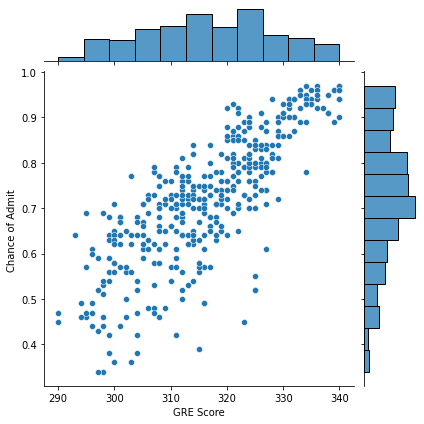

In [47]:
sns.jointplot(x="GRE Score", y="Chance of Admit ", data=df)

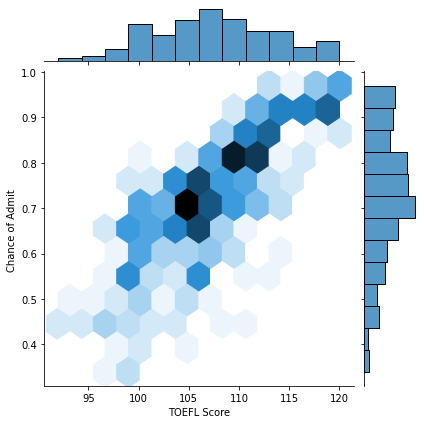

In [48]:
sns.jointplot(x="TOEFL Score", y="Chance of Admit ", data=df, kind='hex')


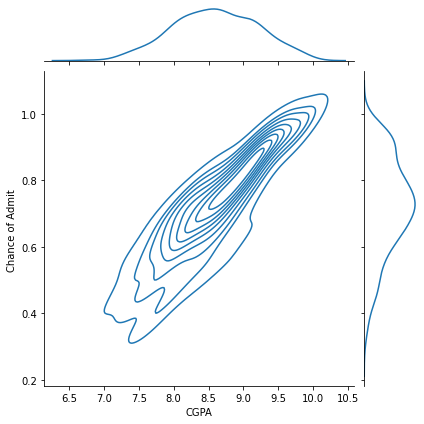

In [49]:
sns.jointplot(x="CGPA", y="Chance of Admit ", data=df, kind="kde")

### Корреляционный анализ

- В данном датасете целевым признаком является параметр "Chance of Admit". Рассмотрим, как остальные параметры с ним коррелируют.

<AxesSubplot:>

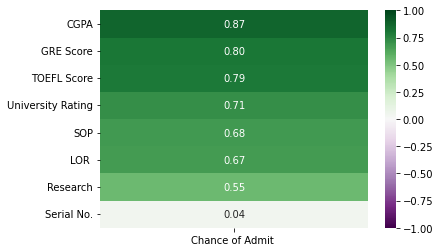

In [38]:
chance_of_admit = pd.DataFrame(df.corr()["Chance of Admit "].sort_values(ascending=False)[1:])

sns.heatmap(chance_of_admit, annot=True,  fmt='.2f', cmap=plt.cm.PRGn, vmin=-1, vmax=1)


In [32]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

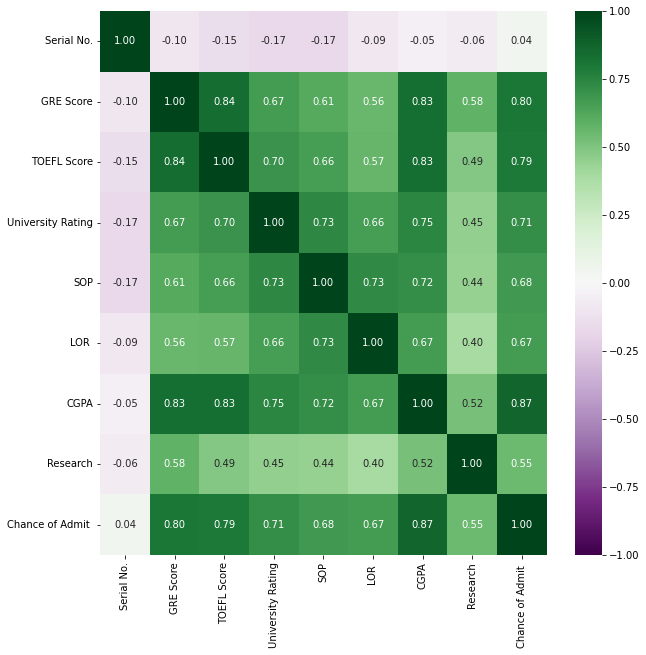

In [36]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 10))

sns.heatmap(df.corr(), annot=True,  fmt='.2f', cmap=plt.cm.PRGn, vmin=-1, vmax=1)

Выше представлены матрица корреляций признаков между собой, а также матрица корреляции для целевого признака. Из этих матриц можно сделать следующие выводы:

- Значение параметра "Serial No" никак не коррелирует со всеми остальными параметрами. В дальнейшем этот столбец можно будет опустить.
- Целевой признак достаточно неплохо коррелирует (положительно) со всеми параметрами. Очень высокая положительная корреляция наблюдается с "CGPA", "GRE Score", "TOEFL Score". 
- Также высокая корреляция наблюдается между парами этих параметров, а значит во избежании мультиколлинеарности необходимо выбрать один из этих признаков. Логичнее всего оставить "CGPA", т.к. с ним у целевого признака наблюдается наибольшая связь.

> В результате корреляционного анализа было принято решение в моделях машинного обучения для прогноза целевого признака использовать параметры: "CGPA", "University Rating", "SOP", "LOR" и "Research".